In [73]:
# import library
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.layers import Input, Dense, concatenate
from sklearn.model_selection import train_test_split
from keras.models import Sequential

from sklearn.preprocessing import StandardScaler

In [74]:
# laoding data
data =  pd.read_csv("C:\\Users\\xinga\\OneDrive\\文档\\GitHub\\AI-Project\\dataset\\card_transdata.csv")
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [75]:
# inspect data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [76]:
# check if there any missing values
null_rows = data[data.isnull().any(axis=1)]
print(null_rows)

Empty DataFrame
Columns: [distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price, repeat_retailer, used_chip, used_pin_number, online_order, fraud]
Index: []


In [77]:
# define your X and Y
# X is input data
X = data.drop(["fraud"],axis = 1).values
# Y is prediction for Fraud/Not Fraud
Y = data["fraud"].values

In [78]:
# check our data size
print(X.shape)
print(Y.shape)

(1000000, 7)
(1000000,)


In [79]:
# split our dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

In [80]:
# check our test and train set are split into 80% and 20%
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(800000, 7)
(200000, 7)
(800000,)
(200000,)


Create the keras model

In [81]:
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1],activation = 'relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
# output of this layer will be probability betweent 0 and 1 so, we will use sigmoide activation
model.add(Dense(1, activation='sigmoid'))

compile the model

In [82]:
# we use binary_crossentropy because it is a binary classification

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Train the model

In [83]:
# fit our model,because our dataset has 1 million, so we will only try 10 epochs, otherwise it will take forever to run the model
# i change the batch_size to 128 also because the size are too big
result = model.fit(X_train,Y_train,epochs=10, batch_size=128, validation_data=(X_test,Y_test))

Epoch 1/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.0579 - accuracy: 0.9748 - val_loss: 0.0200 - val_accuracy: 0.9933
Epoch 2/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0267 - accuracy: 0.9893 - val_loss: 0.0200 - val_accuracy: 0.9913
Epoch 3/10
6250/6250 [==============================] - 8s 1ms/step - loss: 0.0178 - accuracy: 0.9929 - val_loss: 0.0149 - val_accuracy: 0.9942
Epoch 4/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0133 - accuracy: 0.9946 - val_loss: 0.0085 - val_accuracy: 0.9965
Epoch 5/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0116 - accuracy: 0.9953 - val_loss: 0.0089 - val_accuracy: 0.9969
Epoch 6/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0102 - accuracy: 0.9959 - val_loss: 0.0071 - val_accuracy: 0.9969
Epoch 7/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0096 - accuracy: 0.9962 - val_loss: 0.0098 - val_accuracy:

Evaluate model

In [84]:
loss, accuracy = model.evaluate(X_test, Y_test)
# we can see that our accuracy is really high as 99.6%

6250/6250 [==============================] - 6s 901us/step - loss: 0.0112 - accuracy: 0.9960


Visualize Accuracy and Loss

In [85]:
import matplotlib.pyplot as plt

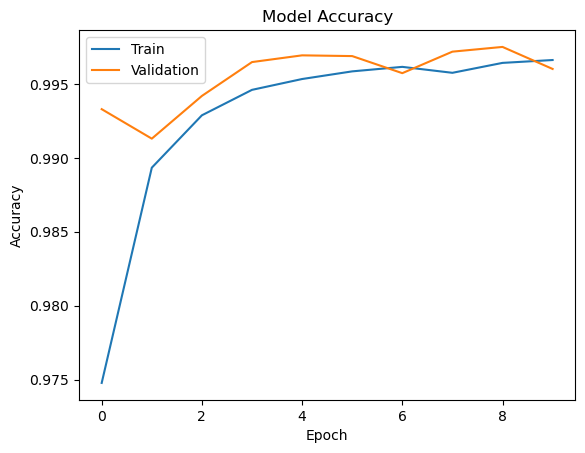

In [86]:
# Plot the training and validation accuracy over epochs
plt.plot(result.history['accuracy']) #plt.plot() is a function used to create a line plot of two or more arrays of data
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Accuracy are goes up to 99.50%

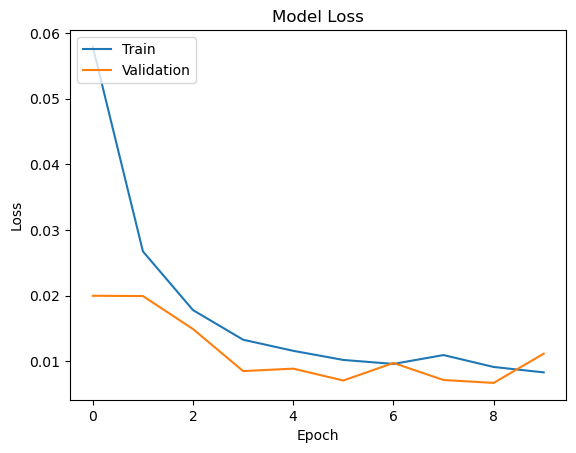

In [87]:
# Plot the training and validation loss over epochs
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss drop to 0.01